📊 Desafio 55 — Funcionários de uma Startup
📂 Dataset: dia_55_funcionarios_startup.csv

Este conjunto de dados simula informações de colaboradores de uma startup, incluindo salário, tempo de empresa, desempenho e se foram promovidos.

🔍 Tarefas:

Tratamento de Dados:

    Verifique se há valores duplicados ou ausentes. Se houver, trate-os de forma apropriada.

Análise Comum:

    Qual é o salário médio por departamento?

Gráfico:

    Crie um gráfico de barras comparando o tempo médio de empresa por departamento.

Machine Learning:

    Modele a variável promovido com base nas demais variáveis. Sugestões:

    Use RandomForestClassifier.

    Divida os dados com train_test_split.

    Avalie o modelo com accuracy_score e classification_report.

    Exiba as variáveis mais importantes para a predição.

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("dia_55_funcionarios_startup.csv")
df.head()

,id,departamento,tempo_empresa_anos,salario_mensal,avaliacao_desempenho,promovido
0,1,Financeiro,4.0,3188,2.6,0
1,2,TI,2.5,4876,3.7,0
2,3,Marketing,3.0,11797,2.5,1
3,4,TI,9.4,7371,4.6,0
4,5,Financeiro,6.7,8573,2.8,0


In [17]:
#Verifique se há valores duplicados ou ausentes. Se houver, trate-os de forma apropriada.
df["tempo_empresa_anos"] = pd.to_numeric(df["tempo_empresa_anos"],errors="coerce")
df["salario_mensal"] = pd.to_numeric(df["salario_mensal"],errors="coerce")
df["avaliacao_desempenho"] = pd.to_numeric(df["avaliacao_desempenho"],errors="coerce")

df.drop_duplicates()
df.duplicated().sum()

0

In [20]:
#Qual é o salário médio por departamento?
salarioMedioDepart = df.groupby("departamento")["salario_mensal"].mean().round(2).sort_values(ascending=False)
print(salarioMedioDepart)

departamento
Marketing     8638.62
TI            8054.65
RH            7634.00
Financeiro    6358.69
Name: salario_mensal, dtype: float64


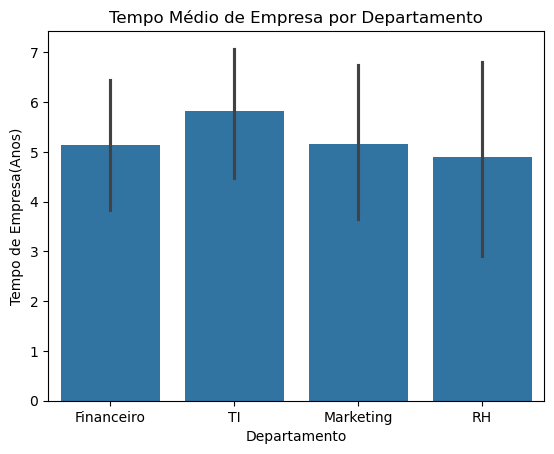

In [34]:
#Crie um gráfico de barras comparando o tempo médio de empresa por departamento.
sns.barplot(data=df, x="departamento", y="tempo_empresa_anos")
plt.title("Tempo Médio de Empresa por Departamento")
plt.ylabel("Tempo de Empresa(Anos)")
plt.xlabel("Departamento")
plt.show()

In [42]:
#Modele a variável promovido com base nas demais variáveis.

le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

X = df.drop(["promovido"], axis=1)
y = df["promovido"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Acurácia: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Acurácia: 0.6
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.40      0.40      0.40         5

    accuracy                           0.60        15
   macro avg       0.55      0.55      0.55        15
weighted avg       0.60      0.60      0.60        15



In [46]:
importancias = pd.DataFrame({"variavel": X.columns, "importancia": model.feature_importances_})
print(importancias.sort_values(by="importancia", ascending=False))

               variavel  importancia
3        salario_mensal     0.281861
4  avaliacao_desempenho     0.236782
2    tempo_empresa_anos     0.217370
0                    id     0.181967
1          departamento     0.082020
